#### We import our data

In [1]:
import numpy as np
X = np.load('data/X.npy')
Y = np.load('data/Y.npy')

In [2]:
X = np.stack((X, X, X), axis=3)  # we stack 3  times the numpy array in order to have 3 depths (to match the pretrained model)
X.shape

(2062, 64, 64, 3)

#### We load the pre trained model VGG16

In [3]:
from keras.applications.vgg16 import VGG16
vgg_base = VGG16(weights="imagenet", include_top=False, classes=10, input_shape=(64,64,3))
print(vgg_base.summary())

Using TensorFlow backend.


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0     

#### Récupération des features de X

In [4]:
features_train = vgg_base.predict(X)

In [5]:
features_train.shape

(2062, 2, 2, 512)

#### Reshape des features extraites

In [6]:
train_x=features_train.reshape(2062,2048) # (2x2x512=2048)

In [7]:
train_x.shape

(2062, 2048)

#### Split de train_x et Y

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train_x, Y, test_size=0.3, random_state=42)

#### Création du modèle

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

In [11]:
model=Sequential()

model.add(Dense(1000, input_dim=2048, activation='relu',kernel_initializer='uniform'))
keras.layers.core.Dropout(0.3, noise_shape=None, seed=None)

model.add(Dense(500,input_dim=1000,activation='sigmoid'))
keras.layers.core.Dropout(0.4, noise_shape=None, seed=None)

model.add(Dense(150,input_dim=500,activation='sigmoid'))
keras.layers.core.Dropout(0.2, noise_shape=None, seed=None)

model.add(Dense(units=10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

#### Entrainement du modèle

In [12]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1, validation_data=(X_valid,y_valid))

Train on 1443 samples, validate on 619 samples
Epoch 1/20
1443/1443 [==============================] - 3s 2ms/step - loss: 1.7277 - accuracy: 0.4428 - val_loss: 1.1165 - val_accuracy: 0.6527
Epoch 2/20
1443/1443 [==============================] - 2s 2ms/step - loss: 0.7770 - accuracy: 0.7672 - val_loss: 0.5765 - val_accuracy: 0.8110
Epoch 3/20
1443/1443 [==============================] - 3s 2ms/step - loss: 0.4663 - accuracy: 0.8496 - val_loss: 0.3917 - val_accuracy: 0.8805
Epoch 4/20
1443/1443 [==============================] - 3s 2ms/step - loss: 0.3239 - accuracy: 0.8981 - val_loss: 0.3016 - val_accuracy: 0.9111
Epoch 5/20
1443/1443 [==============================] - 3s 2ms/step - loss: 0.3394 - accuracy: 0.8891 - val_loss: 0.3131 - val_accuracy: 0.9079
Epoch 6/20
1443/1443 [==============================] - 3s 2ms/step - loss: 0.1887 - accuracy: 0.9390 - val_loss: 0.2759 - val_accuracy: 0.8950
Epoch 7/20
1443/1443 [==============================] - 3s 2ms/step - loss: 0.2218 - accu

#### Prédictions sur X_valid

In [13]:
yhat = model.predict(X_valid)

#### Transformation des prédictions en Dataframe

In [15]:
import pandas as pd
from pandas import DataFrame
df = DataFrame(yhat)
df

,0,1,2,3,4,5,6,7,8,9
0,0.000413,0.000296,0.000193,0.000916,0.000026,0.000240,0.996817,0.000103,0.000011,0.000986
1,0.000223,0.000173,0.000064,0.000016,0.000056,0.000226,0.001982,0.001221,0.000009,0.996031
2,0.000101,0.001994,0.013967,0.129035,0.023011,0.000886,0.005437,0.011717,0.813235,0.000617
3,0.000202,0.000170,0.000030,0.000009,0.000032,0.000236,0.000942,0.000932,0.000006,0.997441
4,0.996300,0.000119,0.000154,0.000013,0.000431,0.002007,0.000588,0.000203,0.000004,0.000180
...,...,...,...,...,...,...,...,...,...,...
614,0.000009,0.000184,0.000778,0.995364,0.000043,0.000044,0.001323,0.000234,0.002007,0.000015
615,0.000545,0.000279,0.000039,0.000018,0.000052,0.000255,0.002204,0.001139,0.000007,0.995463
616,0.000009,0.000154,0.000715,0.994456,0.000044,0.000046,0.001403,0.000369,0.002786,0.000019
617,0.000008,0.000117,0.000699,0.995864,0.000033,0.000036,0.001370,0.000279,0.001578,0.000016


#### Identification de la classe majoritaire

In [26]:
df['Class'] = df.iloc[:,:10].idxmax(axis = 1) 
df

,0,1,2,3,4,5,6,7,8,9,Class
0,0.000413,0.000296,0.000193,0.000916,0.000026,0.000240,0.996817,0.000103,0.000011,0.000986,6
1,0.000223,0.000173,0.000064,0.000016,0.000056,0.000226,0.001982,0.001221,0.000009,0.996031,9
2,0.000101,0.001994,0.013967,0.129035,0.023011,0.000886,0.005437,0.011717,0.813235,0.000617,8
3,0.000202,0.000170,0.000030,0.000009,0.000032,0.000236,0.000942,0.000932,0.000006,0.997441,9
4,0.996300,0.000119,0.000154,0.000013,0.000431,0.002007,0.000588,0.000203,0.000004,0.000180,0
...,...,...,...,...,...,...,...,...,...,...,...
614,0.000009,0.000184,0.000778,0.995364,0.000043,0.000044,0.001323,0.000234,0.002007,0.000015,3
615,0.000545,0.000279,0.000039,0.000018,0.000052,0.000255,0.002204,0.001139,0.000007,0.995463,9
616,0.000009,0.000154,0.000715,0.994456,0.000044,0.000046,0.001403,0.000369,0.002786,0.000019,3
617,0.000008,0.000117,0.000699,0.995864,0.000033,0.000036,0.001370,0.000279,0.001578,0.000016,3


#### Performance du modèle

In [32]:
Y_predict = df['Class']

In [34]:
y_valid_flat = [list(y).index(1) for y in y_valid]  # permet de faire une liste de valeurs de 0 à 9, pour avoir la meme structure que Y_predict

In [23]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_valid_flat, Y_predict)
print(accuracy)

0.9111470113085622


In [22]:
predict_ok = []
true = 0
false = 0
for i in range(len(Y_predict)):
    if Y_predict[i] == y_valid_flat[i]:
        p = True 
        true += 1    
    else:
        p = False
        false += 1
    predict_ok.append(p)
                
predict_ok
print('Nombres de prédictions Valide :',true)
print('Nombres de mauvaise prédictions :',false)

Nombres de prédictions Valide : 564
Nombres de mauvaise prédictions : 55


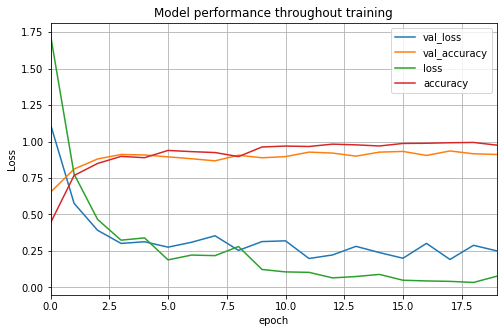

In [25]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.title('Model performance throughout training')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()